In [1]:
# Loading libraries
from math import sqrt
import os
from numpy import array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('parkuet.csv',sep=";", decimal=",")

In [3]:
# df.head()
df = pd.DataFrame(df)
df.head()

,Tahun,Bulan,Penjualan(m2)
0,2019,januari,19754.799
1,2019,februari,20306.970
2,2019,maret,22564.219
3,2019,april,17228.422
4,2019,mei,17215.506


In [4]:
# konversi dataframe ke list
dataset = df['Penjualan(m2)' ]
dataset = dataset[:48].values.tolist()

<Axes: >

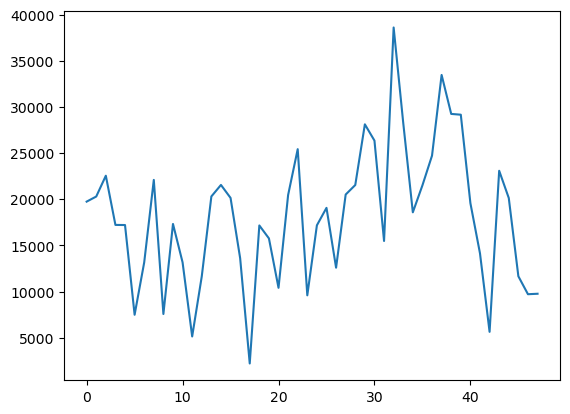

In [5]:
df['Penjualan(m2)'].plot()

# PROSES

In [6]:
# inisiasi nilai
L = 12          # periode musiman
m = 1           # periode ramalan
alpha = 0.01  # konstanta pemulusan
beta = 0.01   # konstanta pemulusan
gamma = 0.2   # konstanta pemulusan
# variabel
# s = nilai level
# b = nilai trend
# I = nilai musiman
# F = nilai forcast

In [7]:
# parsing untuk data training
X = dataset[:48]
len(X)

48

In [8]:
#Inisialisasi Awal

if (alpha,beta,gamma):

    initial_values = array([0.0, 0.0, 0.0])
    type = 'multiplicative'

#inisialisasi awal
s = [sum(X[0:(L)]) / float(L)]
b = [(sum(X[L:2 * L]) - sum(X[0:L])) / L ** 2]
I = [X[i] / s[0] for i in range(L)]
f = [(s[0] + (b[0] * m)) * I[0]]

In [9]:
print("inisiasi pemulusan level ", s)
print("=================")
print("inisiasi pemulusan trend ", b)
print("=================")
print("inisiasi pemulusan seasonal ", I)
print("=================")
print("alpha ", alpha)
print("=================")
print("beta ", beta)
print("=================")
print("gamma ", gamma)
print("=================")
print("f ", f)

inisiasi pemulusan level  [15252.109916666668]
inisiasi pemulusan trend  [37.05262499999986]
inisiasi pemulusan seasonal  [1.2952174556789051, 1.3314203812424443, 1.4794162331169054, 1.1295763074178822, 1.1287294737620428, 0.49073413717148057, 0.8630238748552597, 1.4495680349012259, 0.4960667108576382, 1.136506496131281, 0.8632641694781037, 0.33647672538683016]
alpha  0.01
beta  0.01
gamma  0.2
f  [19802.790206678725]


In [10]:
#Perhitungan Pemulusan

for i in range(len(X)):
    s.append(alpha * (X[i] / I[i]) + (1 - alpha) * (s[i] + b[i]))
    b.append(beta * (s[i + 1] - s[i]) + (1 - beta) * b[i])
    I.append(gamma * (X[i] / s[i + 1]) + (1 - gamma) * I[i])
    f.append((s[i + 1] + (b[i + 1] * m))* I[i + 1])


In [11]:
print("alpha ", alpha)
print("beta ", beta)
print("gamma ", gamma)


alpha  0.01
beta  0.01
gamma  0.2


# HASIL

In [12]:
# hasil

actual = pd.DataFrame(X[:48])
level = pd.DataFrame(s[1:])
trend = pd.DataFrame(b[1:])
seasonal = pd.DataFrame(I[12:])
predict = pd.DataFrame(f[1:])

df = pd.DataFrame(np.c_[actual, level, trend, seasonal, predict], columns=([r'$X_t$',r'$s_t$',r'$b_t$',r'$I_t$',r'$\hat{f}_t+m$']),index=actual.index)
df
#print(actual)
#print(level)
#print(trend)
#print(seasonal)
#print(predict)

,$X_t$,$s_t$,$b_t$,$I_t$,$\hat{f}_t+m$
0,19754.799,15288.792015,37.048920,1.294596,20405.136981
1,20306.970,15325.103625,37.041547,1.330152,22727.006942
2,22564.219,15361.044819,37.030543,1.477318,17393.301109
3,17228.422,15396.615708,37.015947,1.127456,17420.394935
4,17215.506,15431.816437,36.997794,1.126101,7591.075205
5,7484.731,15466.647188,36.976124,0.489373,13379.997065
6,13162.935,15501.108178,36.950973,0.860251,22523.473869
7,22108.971,15535.199658,36.922378,1.444285,7724.811360
8,7566.064,15568.921915,36.890376,0.494048,17736.107047
9,17334.122,15602.275268,36.855006,1.131405,13500.700807


# MAPE

In [13]:
y_true = dataset[:48]
y_pred = f[:48]

In [14]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = MAPE(y_true, y_pred)
print("MAPE = ", mape)

MAPE =  34.359417938418346


# MAD

In [15]:
def MAD(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)))

mad = MAD(y_true, y_pred)
print("MAD = ", mad)

MAD =  4999.5254261809305


# Grafik Perbandingan Data Aktual & Prediksi

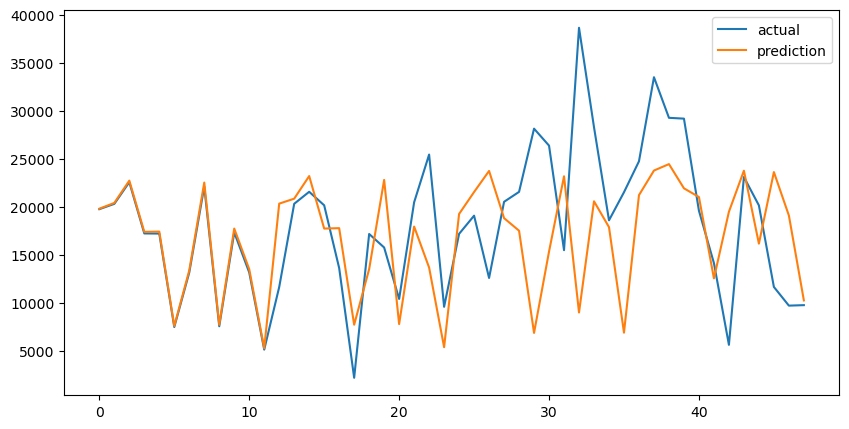

In [16]:
# ploting perbandingan hasil prediksi dan aktual
a = dataset[:48]
b = f[:48]

plt.figure(figsize=(10,5))
plt.plot(a, label='actual')
plt.plot(b, label='prediction')
plt.legend(loc='best')
plt.show()